In [3]:
import pandas as pd

In [4]:
df_suicides_state_year = pd.read_csv("suicidios_por_estados_por_ano.csv")

In [16]:
df_suicides_state_year.head()

,Unnamed: 0,abrev_estado,estado,regiao,ano,n
0,1,RO,Rondônia,Norte,2010,82
1,2,RO,Rondônia,Norte,2011,78
2,3,RO,Rondônia,Norte,2012,73
3,4,RO,Rondônia,Norte,2013,86
4,5,RO,Rondônia,Norte,2014,84


# Grouping macro regions, year and number of suicides

In [58]:
sum_suicides_macro_regions_year = df_suicides_state_year.groupby(['regiao', 'ano'])['n'].sum().reset_index()
sum_suicides_macro_regions_year['regiao'] = sum_suicides_macro_regions_year['regiao'].replace('Centro Oeste', 'Centro-Oeste')
sum_suicides_macro_regions_year

,regiao,ano,n
0,Centro-Oeste,2010,816
1,Centro-Oeste,2011,809
2,Centro-Oeste,2012,942
3,Centro-Oeste,2013,966
4,Centro-Oeste,2014,957
5,Centro-Oeste,2015,944
6,Centro-Oeste,2016,1037
7,Centro-Oeste,2017,1123
8,Centro-Oeste,2018,1184
9,Centro-Oeste,2019,1290


# Total population of macro regions

In [59]:
df_total_population_macro_regions = pd.read_csv("total_population_of_macro_regions_projection.csv")

In [72]:
df_total_population_macro_regions.head()

,regiao,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Centro-Oeste,14058094,14231008,14406049,14583244,14762618,14944198,15128012,15314086,15502449,15693130,15886155,16081555,16287809
1,Nordeste,53081950,53209346,53337049,53465058,53593374,53721998,53850931,53980173,54109725,54239589,54369764,54500251,54644582
2,Norte,15864454,15983437,16103313,16224088,16345768,16468361,16591874,16716313,16841686,16967998,17095258,17223473,17349619
3,Sudeste,80364410,80726049,81089317,81454218,81820762,82188956,82558806,82930321,83303507,83678373,84054926,84433173,84847187
4,Sul,27386891,27589553,27793716,27999390,28206585,28415314,28625587,28837417,29050813,29265790,29482356,29700526,29933315


In [60]:
#Renaming macro region
df_total_population_macro_regions["macro-regiao"] = df_total_population_macro_regions["macro-regiao"].replace("Centro-O", "Centro-Oeste")

In [61]:
#Renaming year columns
df_total_population_macro_regions.columns = [col[-4:] if col != 'macro-regiao' else col for col in df_total_population_macro_regions.columns]

In [62]:
#Renaming column macro region
df_total_population_macro_regions.rename(columns={'macro-regiao': 'regiao'}, inplace=True)

In [63]:
df_total_population_macro_regions.head()

,regiao,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Centro-Oeste,14058094,14231008,14406049,14583244,14762618,14944198,15128012,15314086,15502449,15693130,15886155,16081555,16287809
1,Nordeste,53081950,53209346,53337049,53465058,53593374,53721998,53850931,53980173,54109725,54239589,54369764,54500251,54644582
2,Norte,15864454,15983437,16103313,16224088,16345768,16468361,16591874,16716313,16841686,16967998,17095258,17223473,17349619
3,Sudeste,80364410,80726049,81089317,81454218,81820762,82188956,82558806,82930321,83303507,83678373,84054926,84433173,84847187
4,Sul,27386891,27589553,27793716,27999390,28206585,28415314,28625587,28837417,29050813,29265790,29482356,29700526,29933315


In [64]:
#Formatting dataframe with melt function
df_total_population_macro_regions_formated = df_total_population_macro_regions.melt(id_vars=['regiao'], var_name='ano', value_name='populacao')
df_total_population_macro_regions_formated

,regiao,ano,populacao
0,Centro-Oeste,2010,14058094
1,Nordeste,2010,53081950
2,Norte,2010,15864454
3,Sudeste,2010,80364410
4,Sul,2010,27386891
...,...,...,...
60,Centro-Oeste,2022,16287809
61,Nordeste,2022,54644582
62,Norte,2022,17349619
63,Sudeste,2022,84847187


In [65]:
#Changing dataframe variable types
sum_suicides_macro_regions_year['ano'] = sum_suicides_macro_regions_year['ano'].astype('int64')
df_total_population_macro_regions_formated['ano'] = df_total_population_macro_regions_formated['ano'].astype('int64')

In [66]:
#Merging columns by region and year
df_suicides_by_year_and_macro_regions = pd.merge(sum_suicides_macro_regions_year, df_total_population_macro_regions_formated, on=['regiao', 'ano'])

In [67]:
df_suicides_by_year_and_macro_regions

,regiao,ano,n,populacao
0,Centro-Oeste,2010,816,14058094
1,Centro-Oeste,2011,809,14231008
2,Centro-Oeste,2012,942,14406049
3,Centro-Oeste,2013,966,14583244
4,Centro-Oeste,2014,957,14762618
5,Centro-Oeste,2015,944,14944198
6,Centro-Oeste,2016,1037,15128012
7,Centro-Oeste,2017,1123,15314086
8,Centro-Oeste,2018,1184,15502449
9,Centro-Oeste,2019,1290,15693130


# Suicide rate


In [74]:
#Calculating the suicide rate per 100,000 population
df_suicides_by_year_and_macro_regions['taxa_suicidio'] = (df_suicides_by_year_and_macro_regions['n'] / df_suicides_by_year_and_macro_regions['populacao']) * 100000

In [71]:
df_suicides_by_year_and_macro_regions

,regiao,ano,n,populacao,taxa_suicidio
0,Centro-Oeste,2010,816,14058094,5.804485
1,Centro-Oeste,2011,809,14231008,5.684769
2,Centro-Oeste,2012,942,14406049,6.538920
3,Centro-Oeste,2013,966,14583244,6.624041
4,Centro-Oeste,2014,957,14762618,6.482590
5,Centro-Oeste,2015,944,14944198,6.316833
6,Centro-Oeste,2016,1037,15128012,6.854833
7,Centro-Oeste,2017,1123,15314086,7.333118
8,Centro-Oeste,2018,1184,15502449,7.637503
9,Centro-Oeste,2019,1290,15693130,8.220157


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

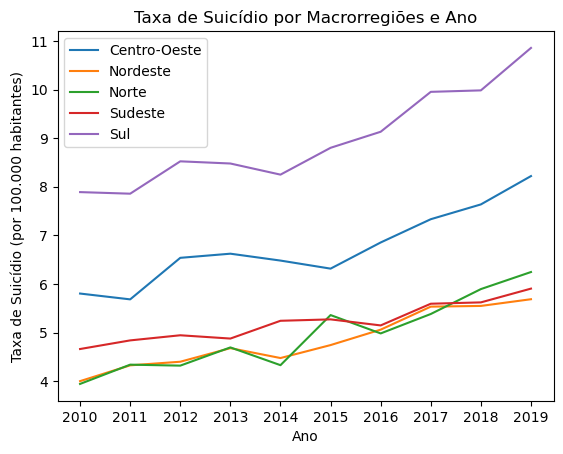

In [79]:
regioes = df_suicides_by_year_and_macro_regions['regiao'].unique()
for regiao in regioes:
    data = df_suicides_by_year_and_macro_regions[df_suicides_by_year_and_macro_regions['regiao'] == regiao]
    plt.plot(data['ano'], data['taxa_suicidio'], label=regiao)

years = df_suicides_by_year_and_macro_regions['ano'].unique()
plt.xticks(anos)

plt.xlabel('Ano')
plt.ylabel('Taxa de Suicídio (por 100.000 habitantes)')
plt.title('Taxa de Suicídio por Macrorregiões e Ano')
plt.legend()

plt.show()